<a href="https://colab.research.google.com/github/shreyash-alt/MARS-RL-Assignment-2025/blob/main/RLAssignmnet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**SARSA(ON-Policy) Update**

Episode 100, Avg Reward (last 100): 0.05, Epsilon: 0.905
Episode 200, Avg Reward (last 100): 0.01, Epsilon: 0.819
Episode 300, Avg Reward (last 100): 0.08, Epsilon: 0.741
Episode 400, Avg Reward (last 100): 0.13, Epsilon: 0.670
Episode 500, Avg Reward (last 100): 0.09, Epsilon: 0.606
Episode 600, Avg Reward (last 100): 0.16, Epsilon: 0.549
Episode 700, Avg Reward (last 100): 0.17, Epsilon: 0.496
Episode 800, Avg Reward (last 100): 0.26, Epsilon: 0.449
Episode 900, Avg Reward (last 100): 0.29, Epsilon: 0.406
Episode 1000, Avg Reward (last 100): 0.35, Epsilon: 0.368
Episode 1100, Avg Reward (last 100): 0.50, Epsilon: 0.333
Episode 1200, Avg Reward (last 100): 0.53, Epsilon: 0.301
Episode 1300, Avg Reward (last 100): 0.48, Epsilon: 0.272
Episode 1400, Avg Reward (last 100): 0.50, Epsilon: 0.246
Episode 1500, Avg Reward (last 100): 0.65, Epsilon: 0.223
Episode 1600, Avg Reward (last 100): 0.69, Epsilon: 0.202
Episode 1700, Avg Reward (last 100): 0.67, Epsilon: 0.183
Episode 1800, Avg Rewar

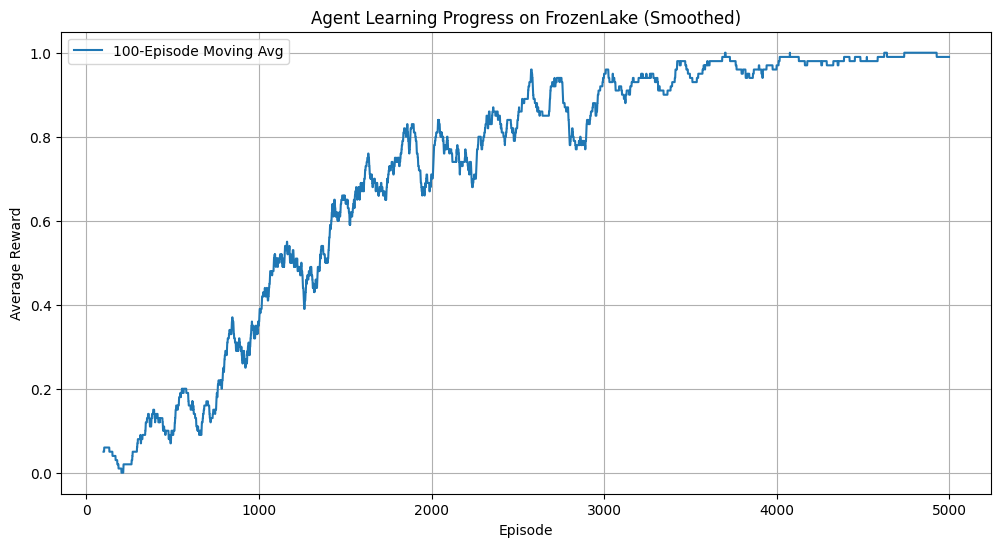


Final Trained Policy Execution:


 Reached the goal successfully!


In [ ]:
import numpy as np
import pandas as pd
import gymnasium as gym
import matplotlib.pyplot as plt
from time import sleep

def epsilon_greedy_policy(Q, state, epsilon):
    if np.random.rand() < epsilon:
            return env.action_space.sample()#random action
    else:
            return np.argmax(Q[state])  # Greedy action

# Environment setup
env = gym.make("FrozenLake-v1", is_slippery=False)
n_states = env.observation_space.n
n_actions = env.action_space.n

# Q-table initialization
Q = np.zeros((n_states, n_actions))

# Hyperparameters
alpha = 0.8
gamma = 0.95
epsilon = 1.0
epsilon_decay = 0.999
epsilon_min = 0.01
episodes = 5000
max_steps = 100


# Track rewards
rewards_per_episode = []

# Q-learning training loop
for ep in range(episodes):
    state,_ = env.reset()

    total_reward = 0
    done = False

    for step in range(max_steps):
        action = epsilon_greedy_policy(Q, state, epsilon)

        result = env.step(action)
        new_state, reward, terminated, truncated, _ = result
        next_action = epsilon_greedy_policy(Q, new_state, epsilon)
        done = terminated or truncated


        # Q-learning update
        Q[state, action] += alpha * (reward + gamma * Q[new_state,next_action] - Q[state, action])#sarsa update
        state = new_state
        action = next_action
        total_reward += reward

        if done:
            break

    rewards_per_episode.append(total_reward)
    epsilon = max(epsilon_min, epsilon * epsilon_decay)

    # Progress report
    if (ep + 1) % 100 == 0:
        avg_reward = np.mean(rewards_per_episode[-100:])
        print(f"Episode {ep + 1}, Avg Reward (last 100): {avg_reward:.2f}, Epsilon: {epsilon:.3f}")

# Plot rewards
plt.figure(figsize=(12, 6))
rolling_avg = pd.Series(rewards_per_episode).rolling(100).mean()
plt.plot(rolling_avg, label='100-Episode Moving Avg')
plt.xlabel('Episode')
plt.ylabel('Average Reward')
plt.title('Agent Learning Progress on FrozenLake (Smoothed)')
plt.grid(True)
plt.legend()
plt.show()

# Visualize the learned policy
print("\nFinal Trained Policy Execution:\n")
env = gym.make("FrozenLake-v1", is_slippery=False, render_mode="human")
state,_ = env.reset()

done = False
sleep(1)
env.render()

while not done:
    action = np.argmax(Q[state])
    result = env.step(action)

    state, reward, terminated, truncated, _ = result
    done = terminated or truncated

    sleep(0.8)
    env.render()

if reward == 1:
    print("\n Reached the goal successfully!")
else:
    print("\n Fell into a hole or failed.")

env.close()

**Q-Learning(OFF-Policy) Update**

Episode 100, Avg Reward (last 100): 0.00, Epsilon: 0.905
Episode 200, Avg Reward (last 100): 0.01, Epsilon: 0.819
Episode 300, Avg Reward (last 100): 0.00, Epsilon: 0.741
Episode 400, Avg Reward (last 100): 0.06, Epsilon: 0.670
Episode 500, Avg Reward (last 100): 0.18, Epsilon: 0.606
Episode 600, Avg Reward (last 100): 0.23, Epsilon: 0.549
Episode 700, Avg Reward (last 100): 0.38, Epsilon: 0.496
Episode 800, Avg Reward (last 100): 0.46, Epsilon: 0.449
Episode 900, Avg Reward (last 100): 0.52, Epsilon: 0.406
Episode 1000, Avg Reward (last 100): 0.59, Epsilon: 0.368
Episode 1100, Avg Reward (last 100): 0.58, Epsilon: 0.333
Episode 1200, Avg Reward (last 100): 0.72, Epsilon: 0.301
Episode 1300, Avg Reward (last 100): 0.69, Epsilon: 0.272
Episode 1400, Avg Reward (last 100): 0.79, Epsilon: 0.246
Episode 1500, Avg Reward (last 100): 0.64, Epsilon: 0.223
Episode 1600, Avg Reward (last 100): 0.78, Epsilon: 0.202
Episode 1700, Avg Reward (last 100): 0.81, Epsilon: 0.183
Episode 1800, Avg Rewar

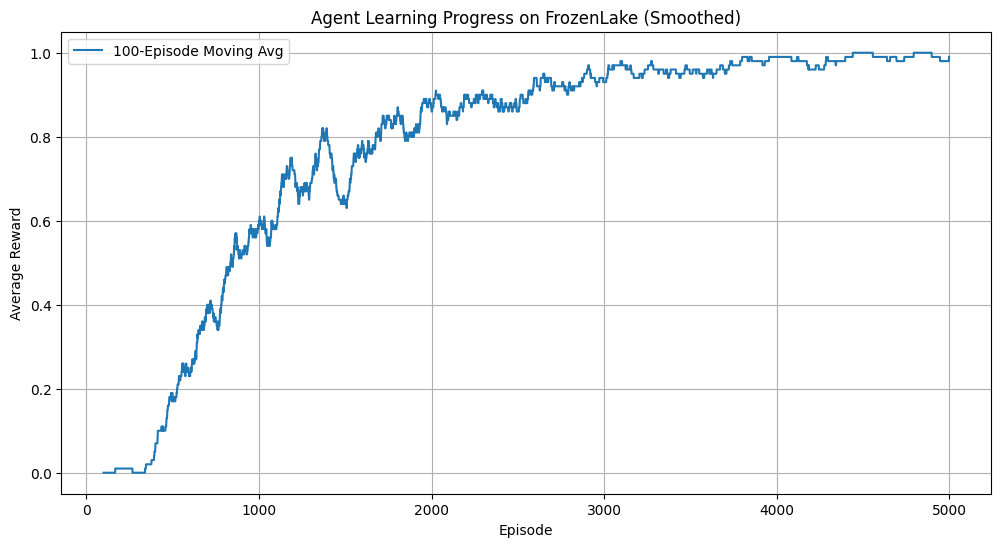


Final Trained Policy Execution:


 Reached the goal successfully!


In [ ]:
import numpy as np
import pandas as pd
import gymnasium as gym
import matplotlib.pyplot as plt
from time import sleep

# Environment setup
env = gym.make("FrozenLake-v1", is_slippery=False)  # deterministic setup
n_states = env.observation_space.n
n_actions = env.action_space.n

# Q-table initialization
Q = np.zeros((n_states, n_actions))

# Hyperparameters
alpha = 0.8
gamma = 0.95
epsilon = 1.0
epsilon_decay = 0.999  # slower decay to allow more exploration
epsilon_min = 0.01
episodes = 5000
max_steps = 100


# Track rewards
rewards_per_episode = []

# Q-learning training loop
for ep in range(episodes):
    state,_ = env.reset()

    total_reward = 0
    done = False

    for step in range(max_steps):
        # Epsilon-greedy policy
        if np.random.rand() < epsilon:
            action = env.action_space.sample()
        else:
            action = np.argmax(Q[state])

        result = env.step(action)
        new_state, reward, terminated, truncated, _ = result
        done = terminated or truncated


        # Q-learning update
        Q[state, action] += alpha * (reward + gamma * np.max(Q[new_state]) - Q[state, action])
        state = new_state
        total_reward += reward

        if done:
            break

    rewards_per_episode.append(total_reward)
    epsilon = max(epsilon_min, epsilon * epsilon_decay)

    # Progress report
    if (ep + 1) % 100 == 0:
        avg_reward = np.mean(rewards_per_episode[-100:])
        print(f"Episode {ep + 1}, Avg Reward (last 100): {avg_reward:.2f}, Epsilon: {epsilon:.3f}")

# Plot rewards
plt.figure(figsize=(12, 6))
rolling_avg = pd.Series(rewards_per_episode).rolling(100).mean()
plt.plot(rolling_avg, label='100-Episode Moving Avg')
plt.xlabel('Episode')
plt.ylabel('Average Reward')
plt.title('Agent Learning Progress on FrozenLake (Smoothed)')
plt.grid(True)
plt.legend()
plt.show()

# Visualize the learned policy
print("\nFinal Trained Policy Execution:\n")
env = gym.make("FrozenLake-v1", is_slippery=False, render_mode="human")
state,_ = env.reset()

done = False
sleep(1)
env.render()

while not done:
    action = np.argmax(Q[state])
    result = env.step(action)

    state, reward, terminated, truncated, _ = result
    done = terminated or truncated

    sleep(0.8)
    env.render()

if reward == 1:
    print("\n Reached the goal successfully!")
else:
    print("\n Fell into a hole or failed.")

env.close()

**DQN Cartpole**

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Episode: 1, Reward: 15.0, Epsilon: 0.9950, Avg100: 15.00
Episode: 2, Reward: 15.0, Epsilon: 0.9900, Avg100: 15.00
Episode: 3, Reward: 14.0, Epsilon: 0.9851, Avg100: 14.67
Episode: 4, Reward: 14.0, Epsilon: 0.9801, Avg100: 14.50
Episode: 5, Reward: 45.0, Epsilon: 0.9752, Avg100: 20.60
Episode: 6, Reward: 14.0, Epsilon: 0.9704, Avg100: 19.50
Episode: 7, Reward: 14.0, Epsilon: 0.9655, Avg100: 18.71
Episode: 8, Reward: 15.0, Epsilon: 0.9607, Avg100: 18.25
Episode: 9, Reward: 16.0, Epsilon: 0.9559, Avg100: 18.00
Episode: 10, Reward: 17.0, Epsilon: 0.9511, Avg100: 17.90
Episode: 11, Reward: 28.0, Epsilon: 0.9464, Avg100: 18.82
Episode: 12, Reward: 14.0, Epsilon: 0.9416, Avg100: 18.42
Episode: 13, Reward: 41.0, Epsilon: 0.9369, Avg100: 20.15
Episode: 14, Reward: 18.0, Epsilon: 0.9322, Avg100: 20.00
Episode: 15, Reward: 20.0, Epsilon: 0.9276, Avg100: 20.00
Episode: 16, Reward: 21.0, Epsilon: 0.9229, Avg100: 20.06
Episode: 17, Reward: 18.0, Epsilon: 0.9183, Avg100: 19.94
Episode: 18, Reward: 11

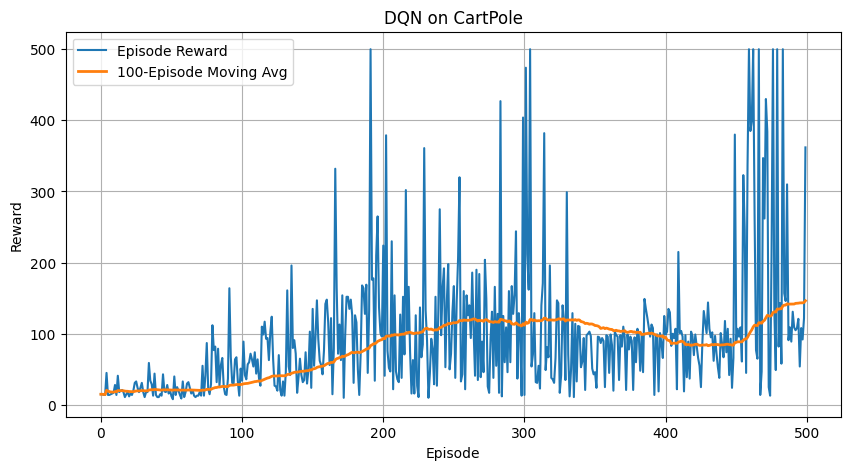

In [ ]:
import gymnasium as gym
import numpy as np
import matplotlib.pyplot as plt
import random
import time
from collections import deque
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

REPLAY_MEMORY_SIZE = 50_000
MIN_REPLAY_MEMORY_SIZE = 1000
MINIBATCH_SIZE = 64
DISCOUNT = 0.99
UPDATE_TARGET_EVERY = 5
EPISODES = 500
EPSILON_DECAY = 0.995
MIN_EPSILON = 0.01
LEARNING_RATE = 0.001

env = gym.make("CartPole-v1")
OBSERVATION_SPACE_VALUES = env.observation_space.shape[0]
ACTION_SPACE_SIZE = env.action_space.n

class DQNAgent:
    def __init__(self):
        self.model = self.create_model()
        self.target_model = self.create_model()
        self.target_model.set_weights(self.model.get_weights())
        self.replay_memory = deque(maxlen=REPLAY_MEMORY_SIZE)
        self.target_update_counter = 0

    def create_model(self):
        model = Sequential()
        model.add(Dense(64, input_shape=(OBSERVATION_SPACE_VALUES,), activation="relu"))
        model.add(Dense(64, activation="relu"))
        model.add(Dense(ACTION_SPACE_SIZE, activation="linear"))
        model.compile(loss="mse", optimizer=Adam(learning_rate=LEARNING_RATE), metrics=["accuracy"])
        return model

    def update_replay_memory(self, transition):
        self.replay_memory.append(transition)

    def get_qs(self, state):
        return self.model.predict(np.array(state).reshape(-1, *state.shape), verbose=0)

    def train(self, terminal_state):
        if len(self.replay_memory) < MIN_REPLAY_MEMORY_SIZE:
            return

        minibatch = random.sample(self.replay_memory, MINIBATCH_SIZE)

        current_states = np.array([transition[0] for transition in minibatch])
        current_qs_list = self.model.predict(current_states, verbose=0)

        new_current_states = np.array([transition[3] for transition in minibatch])
        future_qs_list = self.target_model.predict(new_current_states, verbose=0)

        X, Y = [], []

        for index, (current_state, action, reward, new_state, done) in enumerate(minibatch):
            if not done:
                max_future_q = np.max(future_qs_list[index])
                new_q = reward + DISCOUNT * max_future_q
            else:
                new_q = reward

            current_qs = current_qs_list[index]
            current_qs[action] = new_q

            X.append(current_state)
            Y.append(current_qs)

        self.model.fit(np.array(X), np.array(Y), batch_size=MINIBATCH_SIZE, verbose=0, shuffle=False)

        if terminal_state:
            self.target_update_counter += 1

        if self.target_update_counter > UPDATE_TARGET_EVERY:
            self.target_model.set_weights(self.model.get_weights())
            self.target_update_counter = 0


agent = DQNAgent()
epsilon = 1.0
rewards = []
moving_avg = []

for episode in range(EPISODES):
    current_state, _ = env.reset()
    done = False
    total_reward = 0

    while not done:
        if np.random.random() > epsilon:
            action = np.argmax(agent.get_qs(current_state)[0])
        else:
            action = np.random.randint(0, ACTION_SPACE_SIZE)

        new_state, reward, terminated, truncated, _ = env.step(action)
        done = terminated or truncated

        agent.update_replay_memory((current_state, action, reward, new_state, done))
        agent.train(done)

        current_state = new_state
        total_reward += reward

    rewards.append(total_reward)
    epsilon = max(MIN_EPSILON, epsilon * EPSILON_DECAY)

    avg_reward = np.mean(rewards[-100:])
    moving_avg.append(avg_reward)

    print(f"Episode: {episode + 1}, Reward: {total_reward}, Epsilon: {epsilon:.4f}, Avg100: {avg_reward:.2f}")

    if avg_reward >= 195:
        print(f"\nEnvironment solved in {episode+1} episodes!")
        break


plt.figure(figsize=(10, 5))
plt.plot(rewards, label="Episode Reward")
plt.plot(moving_avg, label="100-Episode Moving Avg", linewidth=2)
plt.xlabel("Episode")
plt.ylabel("Reward")
plt.title("DQN on CartPole")
plt.legend()
plt.grid(True)
plt.show()

**Epsilon Greedy VS Softmax on FrozenLake**

Training with ε-greedy...
Episode 10000, Successes (last 10000): 8846
Episode 20000, Successes (last 10000): 9897
Episode 30000, Successes (last 10000): 9889
Episode 40000, Successes (last 10000): 9896
Episode 50000, Successes (last 10000): 9900
Episode 60000, Successes (last 10000): 9884
Episode 70000, Successes (last 10000): 9912
Episode 80000, Successes (last 10000): 9909
Episode 90000, Successes (last 10000): 9893
Episode 100000, Successes (last 10000): 9908
Training with Softmax (τ=1)...
Episode 10000, Successes (last 10000): 678
Episode 20000, Successes (last 10000): 727
Episode 30000, Successes (last 10000): 764
Episode 40000, Successes (last 10000): 717
Episode 50000, Successes (last 10000): 722
Episode 60000, Successes (last 10000): 728
Episode 70000, Successes (last 10000): 723
Episode 80000, Successes (last 10000): 715
Episode 90000, Successes (last 10000): 665
Episode 100000, Successes (last 10000): 740
Training with Softmax (τ=2)...
Episode 10000, Successes (last 10000): 3

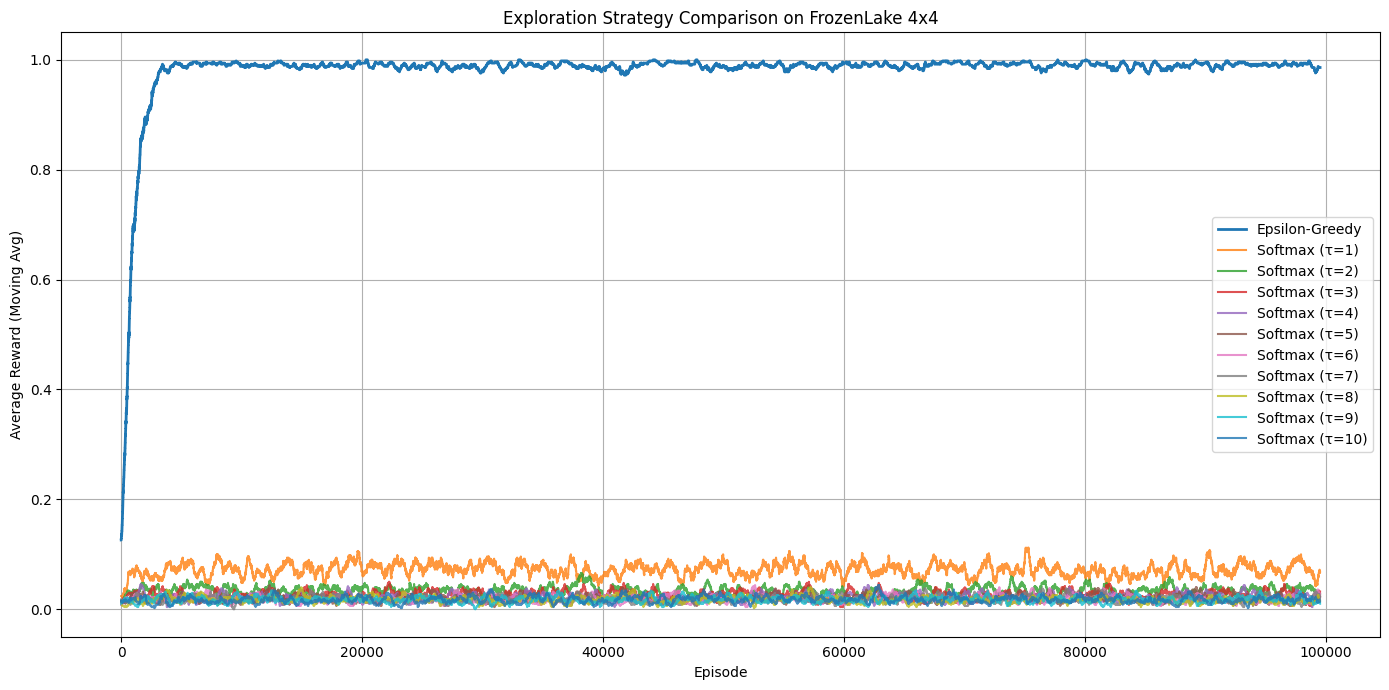

In [ ]:
import numpy as np
import gymnasium as gym
import matplotlib.pyplot as plt

def epsilon_greedy(q_values, epsilon):
    if np.random.rand() < epsilon:
        return np.random.randint(len(q_values))
    return np.argmax(q_values)

def softmax(q_values, tau):
    q_values = np.array(q_values)
    q_values -= np.max(q_values)  # numerical stability
    exp_q = np.exp(q_values / tau)
    probs = exp_q / np.sum(exp_q)
    return np.random.choice(len(q_values), p=probs)

def train_q_learning(env, action_selector, episodes=20000, alpha=0.1, gamma=0.99, **selector_kwargs):
    q_table = np.zeros((env.observation_space.n, env.action_space.n))
    rewards = []
    success_count = 0

    epsilon = selector_kwargs.get("epsilon", 1.0)
    tau = selector_kwargs.get("tau", 1.0)

    for episode in range(episodes):
        state, _ = env.reset()
        total_reward = 0
        done = False

        while not done:
            q_vals = q_table[state]

            if action_selector == epsilon_greedy:
                action = action_selector(q_vals, epsilon)
            else:
                action = action_selector(q_vals, tau)

            next_state, reward, done, truncated, _ = env.step(action)
            shaped_reward = reward if reward == 1 else -0.01

            best_next = np.max(q_table[next_state])
            q_table[state, action] += alpha * (shaped_reward + gamma * best_next - q_table[state, action])

            state = next_state
            total_reward += reward

        if reward == 1:
            success_count += 1
        rewards.append(total_reward)

        if action_selector == epsilon_greedy:
            epsilon = max(0.01, epsilon * 0.999)

        if (episode + 1) % 10000 == 0:
            print(f"Episode {episode + 1}, Successes (last 10000): {success_count}")
            success_count = 0

    return rewards

def moving_avg(data, window=500):
    return np.convolve(data, np.ones(window)/window, mode='valid')


env = gym.make("FrozenLake-v1",is_slippery=False)

# ε-greedy training
print("Training with ε-greedy...")
rewards_eps = train_q_learning(env, epsilon_greedy, episodes=100000, epsilon=1.0)

# Softmax with τ = 1 to 10
softmax_results = {}
for tau in range(1, 11):
    print(f"Training with Softmax (τ={tau})...")
    rewards = train_q_learning(env, softmax, episodes=100000, tau=tau)
    softmax_results[tau] = rewards

# Plotting
plt.figure(figsize=(14, 7))
plt.plot(moving_avg(rewards_eps), label="Epsilon-Greedy", linewidth=2)

for tau, rewards in softmax_results.items():
    plt.plot(moving_avg(rewards), label=f"Softmax (τ={tau})", alpha=0.8)

plt.xlabel("Episode")
plt.ylabel("Average Reward (Moving Avg)")
plt.title("Exploration Strategy Comparison on FrozenLake 4x4")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


**Epsilon Greedy VS Softmax on CartPole**

Training with ε-greedy...
Episode:1000 Reward:512.0
Episode:2000 Reward:1408.0
Episode:3000 Reward:3200.0
Episode:4000 Reward:3200.0
Episode:5000 Reward:3200.0
Episode:6000 Reward:3200.0
Episode:7000 Reward:3200.0
Episode:8000 Reward:3200.0
Episode:9000 Reward:3200.0
Episode:10000 Reward:528.0
Training with Softmax (τ=1)...
Episode:1000 Reward:176.0
Episode:2000 Reward:784.0
Episode:3000 Reward:320.0
Episode:4000 Reward:240.0
Episode:5000 Reward:288.0
Episode:6000 Reward:208.0
Episode:7000 Reward:176.0
Episode:8000 Reward:176.0
Episode:9000 Reward:352.0
Episode:10000 Reward:176.0
Training with Softmax (τ=2)...
Episode:1000 Reward:432.0
Episode:2000 Reward:304.0
Episode:3000 Reward:176.0
Episode:4000 Reward:240.0
Episode:5000 Reward:304.0
Episode:6000 Reward:1584.0
Episode:7000 Reward:1056.0
Episode:8000 Reward:240.0
Episode:9000 Reward:224.0
Episode:10000 Reward:240.0
Training with Softmax (τ=3)...
Episode:1000 Reward:336.0
Episode:2000 Reward:288.0
Episode:3000 Reward:352.0
Episode:40

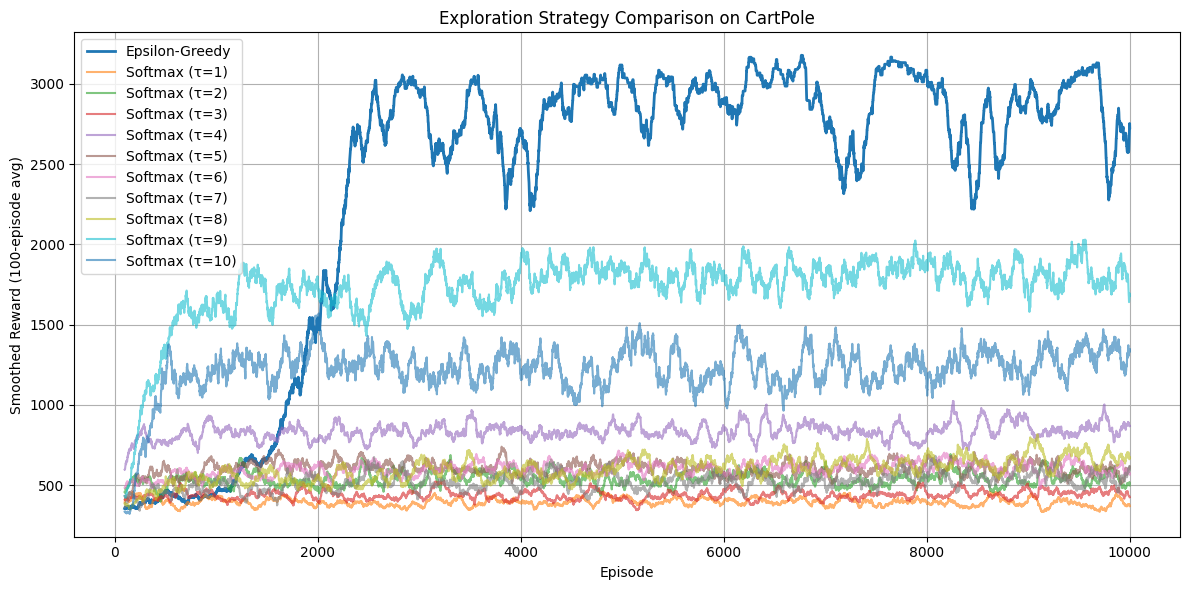

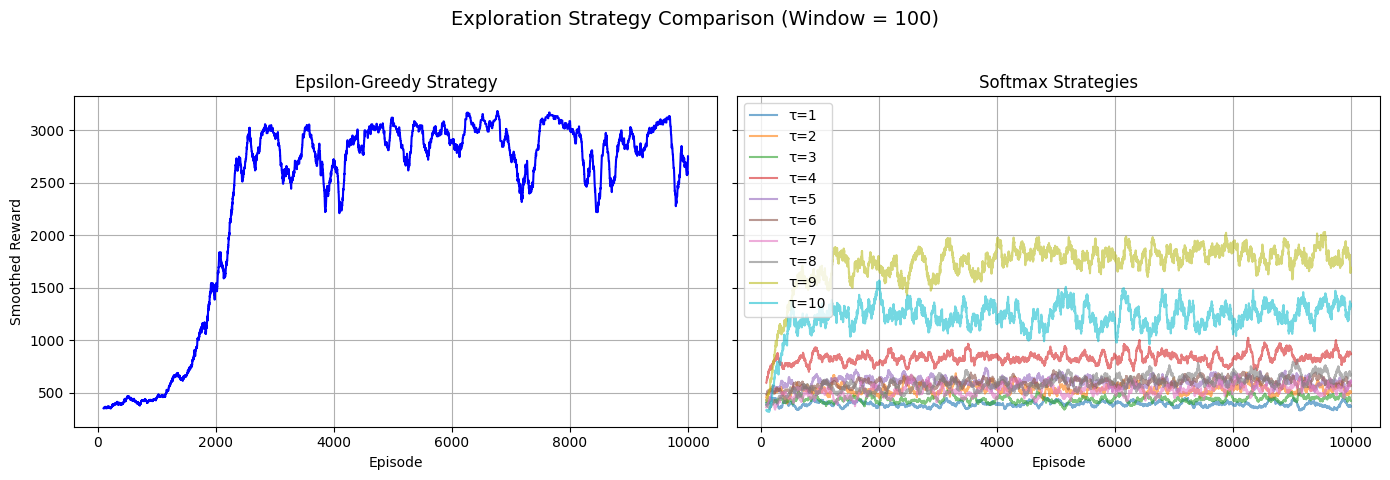

In [ ]:
import gymnasium as gym
import numpy as np
import time
import matplotlib.pyplot as plt
import pandas as pd

env = gym.make("CartPole-v1")
state, _ = env.reset()

# Discretization
NUM_BINS = [24, 24, 24, 24]  # More bins for better accuracy
obs_space_high = env.observation_space.high
obs_space_low = env.observation_space.low
obs_space_low[1] = -10
obs_space_high[1] = 10
obs_space_low[3] = -np.radians(80)
obs_space_high[3] = np.radians(80)
bin_width = (obs_space_high - obs_space_low) / NUM_BINS

def get_discrete_state(state):
    ratios = (state - obs_space_low) / bin_width
    discrete_state = np.clip(ratios.astype(int), 0, np.array(NUM_BINS) - 1)
    return tuple(discrete_state)

EPISODES = 10000
LEARNING_RATE = 0.1
DISCOUNT = 0.95
START_EPSILON_DECAY = 1
END_EPSILON_DECAY = EPISODES // 2
MAX_STEPS = 200

def epsilon_greedy(q_values, epsilon):
    if np.random.rand() < epsilon:
        return np.random.randint(len(q_values))
    return np.argmax(q_values)

def softmax(q_values, tau):
    q_values = np.array(q_values)
    q_values -= np.max(q_values)  # numerical stability
    exp_q = np.exp(q_values / tau)
    probs = exp_q / np.sum(exp_q)
    return np.random.choice(len(q_values), p=probs)

def train(action_selector, tau=None):
    q_table = np.random.uniform(low=-1, high=1, size=(NUM_BINS + [env.action_space.n]))
    epsilon = 1.0
    rewards = []

    for episode in range(EPISODES):
        state, _ = env.reset()
        discrete_state = get_discrete_state(state)
        done = False
        episode_reward = 0

        for step in range(MAX_STEPS):
            if action_selector == 'epsilon':
                action = epsilon_greedy(q_table[discrete_state], epsilon)
            else:
                action = softmax(q_table[discrete_state], tau)

            new_state, reward, terminated, truncated, _ = env.step(action)
            new_discrete_state = get_discrete_state(new_state)
            v=new_discrete_state[1]
            p=new_state[2]
            cp=new_state[0]
            if(v<=30 and v>=25):
                reward+=15
            if(p<=np.radians(20) and p>=-np.radians(20)):
                reward+=15
            done = terminated or truncated
            episode_reward += reward

            if not done:
                max_future_q = np.max(q_table[new_discrete_state])
                current_q = q_table[discrete_state + (action,)]
                new_q = (1 - LEARNING_RATE) * current_q + LEARNING_RATE * (reward + DISCOUNT * max_future_q)
                q_table[discrete_state + (action,)] = new_q
            else:
                q_table[discrete_state + (action,)] = reward

            discrete_state = new_discrete_state

            if done:
                break

        rewards.append(episode_reward)
        if action_selector == 'epsilon':
            epsilon = max(0.01, epsilon * 0.999)

        if (episode + 1) % 1000 == 0:
            print(f"Episode:{episode + 1} Reward:{episode_reward}")

    return rewards

# Train epsilon-greedy
print("Training with ε-greedy...")
epsilon_rewards = train('epsilon')

# Train softmax with various τ values
tau_values = list(range(1, 11))
softmax_results = {}

for tau in tau_values:
    print(f"Training with Softmax (τ={tau})...")
    rewards = train('softmax', tau=tau)
    softmax_results[tau] = rewards

# Plot comparison
plt.figure(figsize=(12, 6))
plt.plot(pd.Series(epsilon_rewards).rolling(100).mean(), label="Epsilon-Greedy", linewidth=2)
for tau in tau_values:
    plt.plot(pd.Series(softmax_results[tau]).rolling(100).mean(), label=f"Softmax (τ={tau})", alpha=0.6)
plt.xlabel("Episode")
plt.ylabel("Smoothed Reward (100-episode avg)")
plt.title("Exploration Strategy Comparison on CartPole")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Side-by-side comparison
fig, axs = plt.subplots(1, 2, figsize=(14, 5), sharey=True)
axs[0].plot(pd.Series(epsilon_rewards).rolling(100).mean(), color='blue')
axs[0].set_title("Epsilon-Greedy Strategy")
axs[0].set_xlabel("Episode")
axs[0].set_ylabel("Smoothed Reward")
axs[0].grid(True)

for tau in tau_values:
    axs[1].plot(pd.Series(softmax_results[tau]).rolling(100).mean(), label=f"τ={tau}", alpha=0.6)
axs[1].set_title("Softmax Strategies")
axs[1].set_xlabel("Episode")
axs[1].grid(True)
axs[1].legend()

fig.suptitle("Exploration Strategy Comparison (Window = 100)", fontsize=14)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


Episode 100, Avg Reward (last 100): 0.02, Epsilon: 0.905
Episode 200, Avg Reward (last 100): 0.03, Epsilon: 0.819
Episode 300, Avg Reward (last 100): 0.12, Epsilon: 0.741
Episode 400, Avg Reward (last 100): 0.23, Epsilon: 0.670
Episode 500, Avg Reward (last 100): 0.30, Epsilon: 0.606
Episode 600, Avg Reward (last 100): 0.25, Epsilon: 0.549
Episode 700, Avg Reward (last 100): 0.29, Epsilon: 0.496
Episode 800, Avg Reward (last 100): 0.42, Epsilon: 0.449
Episode 900, Avg Reward (last 100): 0.44, Epsilon: 0.406
Episode 1000, Avg Reward (last 100): 0.63, Epsilon: 0.368
Episode 1100, Avg Reward (last 100): 0.54, Epsilon: 0.333
Episode 1200, Avg Reward (last 100): 0.70, Epsilon: 0.301
Episode 1300, Avg Reward (last 100): 0.71, Epsilon: 0.272
Episode 1400, Avg Reward (last 100): 0.68, Epsilon: 0.246
Episode 1500, Avg Reward (last 100): 0.78, Epsilon: 0.223
Episode 1600, Avg Reward (last 100): 0.73, Epsilon: 0.202
Episode 1700, Avg Reward (last 100): 0.80, Epsilon: 0.183
Episode 1800, Avg Rewar

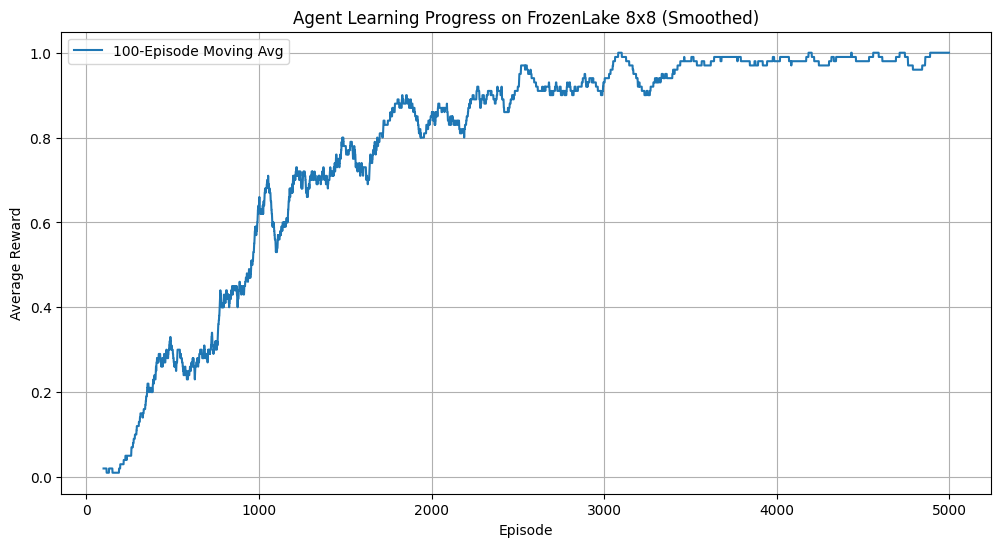

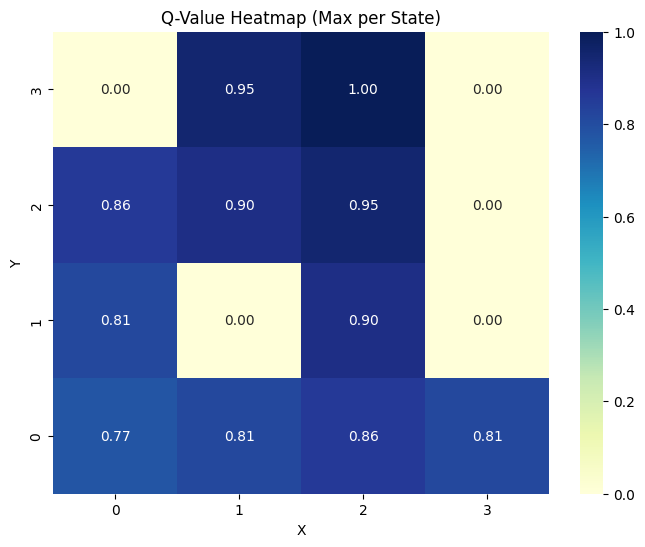

In [ ]:
import numpy as np
import pandas as pd
import gymnasium as gym
import matplotlib.pyplot as plt
from time import sleep
import seaborn as sns


env = gym.make("FrozenLake-v1", is_slippery=False)
n_states = env.observation_space.n
n_actions = env.action_space.n


Q = np.zeros((n_states, n_actions))

alpha = 0.8
gamma = 0.95
epsilon = 1.0
epsilon_decay = 0.999
epsilon_min = 0.01
episodes = 5000
max_steps = 200  # a bit longer for 8x8

rewards_per_episode = []

for ep in range(episodes):
    state, _ = env.reset()
    done = False
    total_reward = 0

    for step in range(max_steps):
        # Epsilon-greedy
        if np.random.rand() < epsilon:
            action = env.action_space.sample()
        else:
            action = np.argmax(Q[state])

        new_state, reward, terminated, truncated, _ = env.step(action)
        done = terminated or truncated

        # Q update
        Q[state, action] += alpha * (reward + gamma * np.max(Q[new_state]) - Q[state, action])
        state = new_state
        total_reward += reward

        if done:
            break

    epsilon = max(epsilon_min, epsilon * epsilon_decay)
    rewards_per_episode.append(total_reward)

    # Logging
    if (ep + 1) % 100 == 0:
        avg = np.mean(rewards_per_episode[-100:])
        print(f"Episode {ep + 1}, Avg Reward (last 100): {avg:.2f}, Epsilon: {epsilon:.3f}")


plt.figure(figsize=(12, 6))
rolling_avg = pd.Series(rewards_per_episode).rolling(100).mean()
plt.plot(rolling_avg, label='100-Episode Moving Avg')
plt.xlabel('Episode')
plt.ylabel('Average Reward')
plt.title('Agent Learning Progress on FrozenLake 8x8 (Smoothed)')
plt.grid(True)
plt.legend()
plt.show()


def plot_q_heatmap(q_table, title="Q-Value Heatmap (Max per State)"):
    grid_size = 4
    max_q = np.max(q_table, axis=1).reshape(grid_size, grid_size)

    plt.figure(figsize=(8, 6))
    sns.heatmap(max_q, annot=True, fmt=".2f", cmap="YlGnBu", cbar=True)
    plt.title(title)
    plt.xlabel("X")
    plt.ylabel("Y")
    plt.gca().invert_yaxis()
    plt.show()

plot_q_heatmap(Q)
